# Hierarchical Clustering

## The Agglomerative Algorithm
1. Make each data point a single point cluster.
2. Take two closest neighbour clusters and make them as one cluster. 
3. Take three closest clusters and make them as one cluster. 
4. Repeat step 3. until all points go in only one cluster.<br>

This is a bottom-up approach: __Aggromerative Hierarchical Clustering__<br>
It is possible to start top-down: __Divisible Hierrchical Clustering__

#### AGglomerative NESting vs DIvisible ANAlysis =  AGNES vs DIANA <br>


## Step 1: Environment

In [23]:
import numpy as np
import pandas as pd

# for drawing dendogram
import scipy.cluster.hierarchy as ch
from scipy.spatial.distance import cdist

# for creating a model
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import matplotlib.pyplot as plt

## Step 2: Data Preparation

In [2]:
!pwd

/Users/tdi/Documents/Teaching/BI/2024-1/Exercises


In [6]:
# Load input data
# X = np.loadtxt('../data/data_clustering.txt', delimiter=',')
data = pd.read_csv('/Users/tdi/Data/shopping-data.csv', delimiter=',')
print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [7]:
data.shape

(200, 5)

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Select attributes and convert to numpy
X = data.iloc[:, 2:5].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

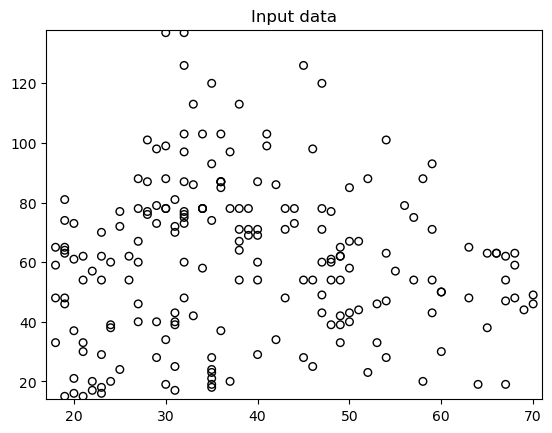

In [16]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:, 0].min()
x_max = X[:, 0].max()

# second column
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# same as above: get the range of X and Y (short way)
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

### Linkage
Linkage is a measure of dissimilarity of sets - the distance between sets of observations as a function of the pairwise distances between observations

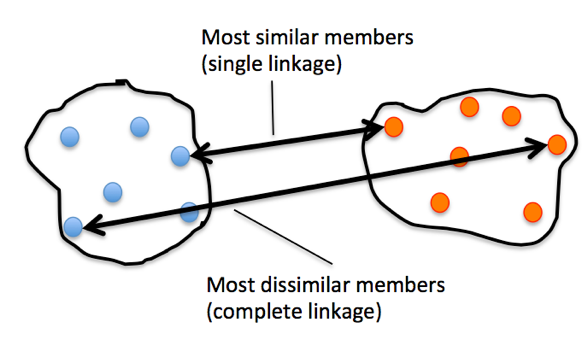

__Method WARD__ starts with _n_ clusters, each containing a single object. These _n_ clusters are combined to make one cluster containing all objects. <br>
At each step, the process makes a new cluster that minimizes variance, measured by an index called __E__ (also called the _sum of squares index_).

### Building Dendogram
A dendogram is a diagram that shows the hierarchical relationship between objects.

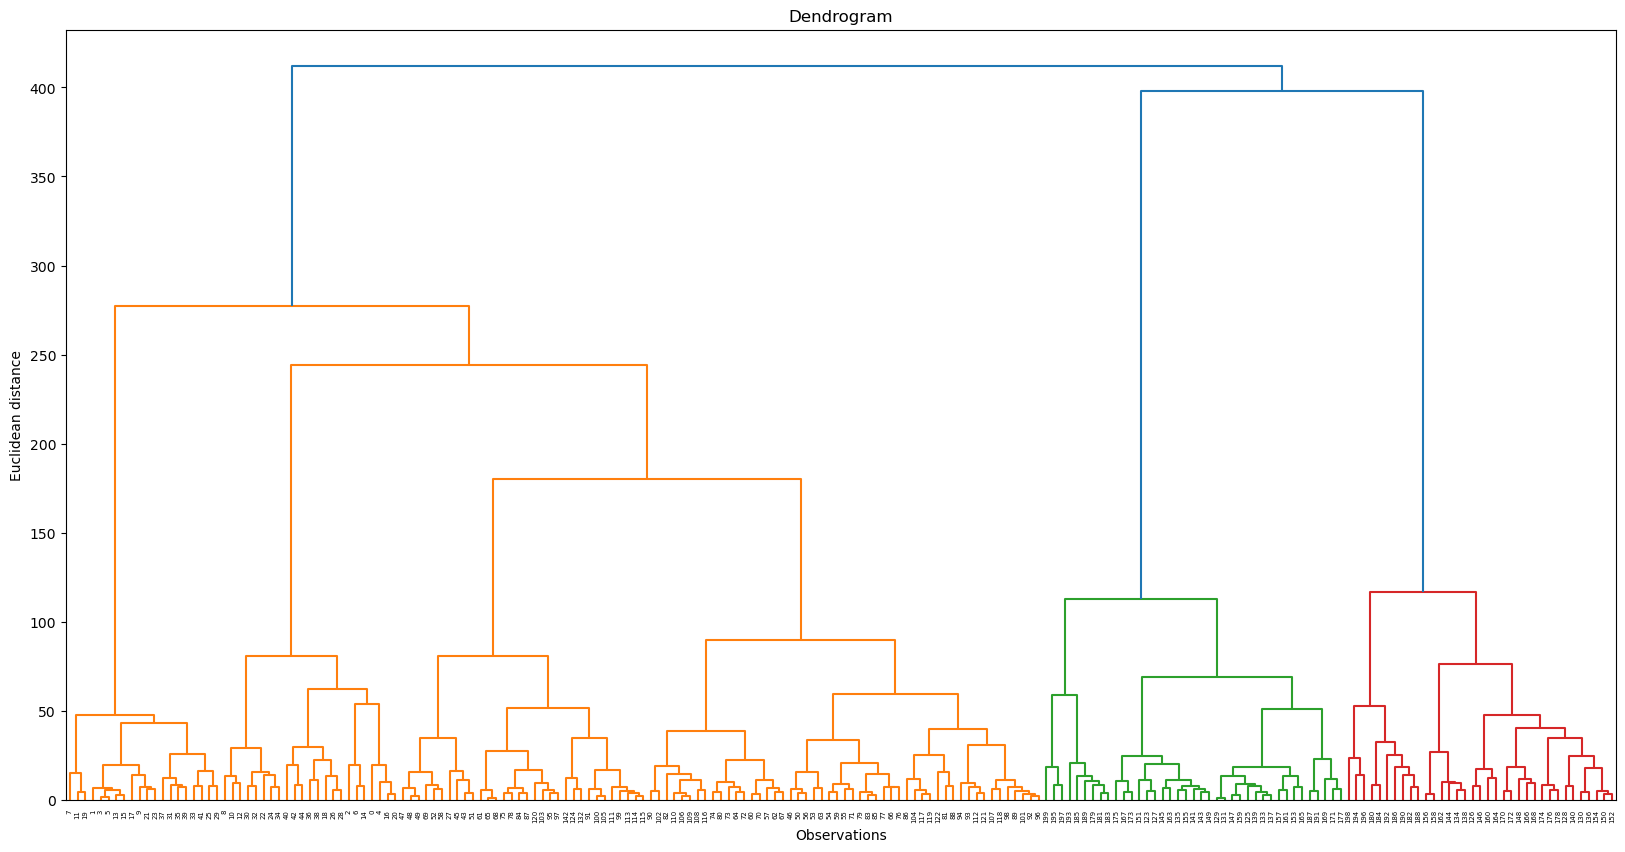

In [10]:
# Use dendogram to find the optimal number of clusters
plt.figure(figsize=(20,10))

dendogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

## Step 3: Train and Implement the Model

In [13]:
n_clusters = 3
model = AgglomerativeClustering(n_clusters, metric = 'euclidean', linkage = 'ward')
model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [14]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [15]:
Y = model.fit_predict(X)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

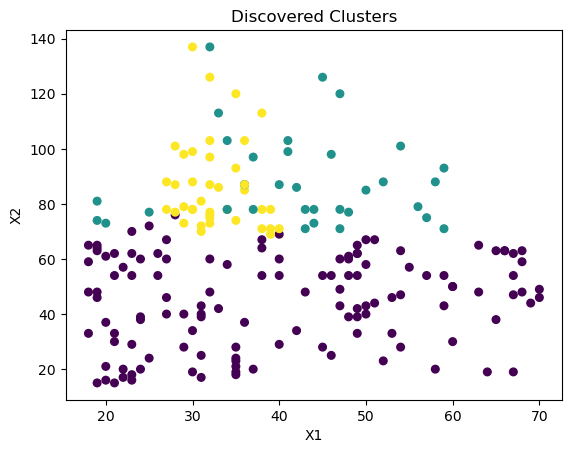

In [11]:
# Visualising the clusters
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap='viridis')
plt.title('Discovered Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
# plt.legend()
plt.show()

In [17]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

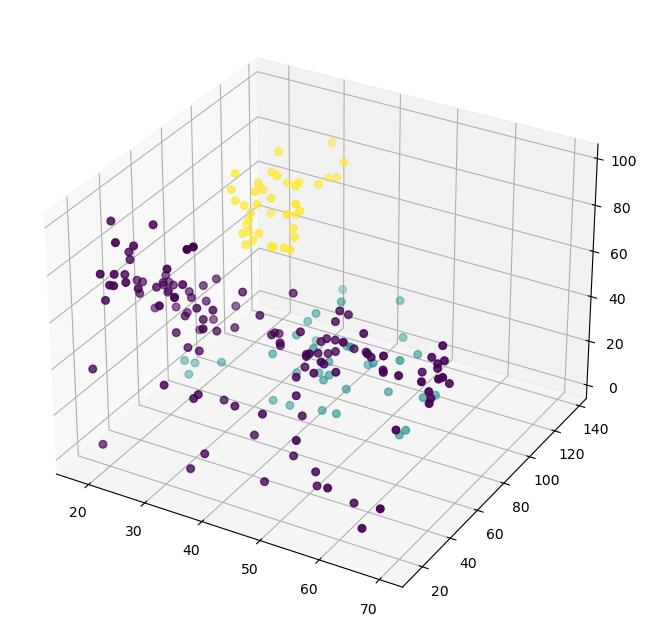

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', s=30, c=Y, cmap='viridis')

plt.show()

## K-Means vs. Hierarchical Clustering
### K-Means Clustering
 #### Advantages
 > Simple to understand <br>
 > Easily adapptable and efficient<br>
 > Works well on both small and large datasets<br>
 
 #### Disadvantages
 > Need to know the optimal number of clusters in advance
 
### Hierarchical Clustering
 #### Advantages
 > The optimal number of clusters can be obtained from the model itself<br>
 > Dendograms are practical and easy to understand<br>
 
 #### Disadvantages
 > Not suitable for large datasets

## Store the Model

In [ ]:
!pip install joblib

In [ ]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(model, '../deploy/hmodel.pkl')

In [ ]:
# To load the model in another application
# joblib.load(<filename here>)